In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('E:\PTDL\shopeep_koreantop_clothing_shop_data.csv')
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [4]:
list_item =[]
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
    
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,pk_shop,int64,0,0.000000,746,"[20210613254711738, 20210613314198143, 2021061..."
1,date_collected,object,0,0.000000,4,"[2021-06-13, 2021-06-21, 2021-06-28, 2021-07-06]"
2,shopid,int64,0,0.000000,387,"[254711738, 314198143, 10377223, 21407329]"
3,name,object,0,0.000000,391,"[hello.may.ph, love.women.shop, R&O RedOrange,..."
4,join_month,object,0,0.000000,12,"[April, September, October, February]"
5,join_day,int64,0,0.000000,31,"[27, 25, 30, 18]"
6,join_year,int64,0,0.000000,7,"[2020, 2016, 2017, 2021]"
7,item_count,int64,0,0.000000,484,"[446, 263, 209, 165]"
8,follower_count,int64,0,0.000000,733,"[17487, 8574, 660417, 18787]"
9,response_time,object,0,0.000000,727,"[ 10:13:55, 10:43:05, 08:32:07, 09:10:38]"


# Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm.

In [14]:
year_group = df.groupby(df.join_year)
shop_num = pd.DataFrame(year_group['name'].count())
shop_num.columns = ['shop_number']
shop_num

,shop_number
join_year,
2015,4
2016,27
2017,156
2018,87
2019,106
2020,247
2021,119


<AxesSubplot:xlabel='join_year'>

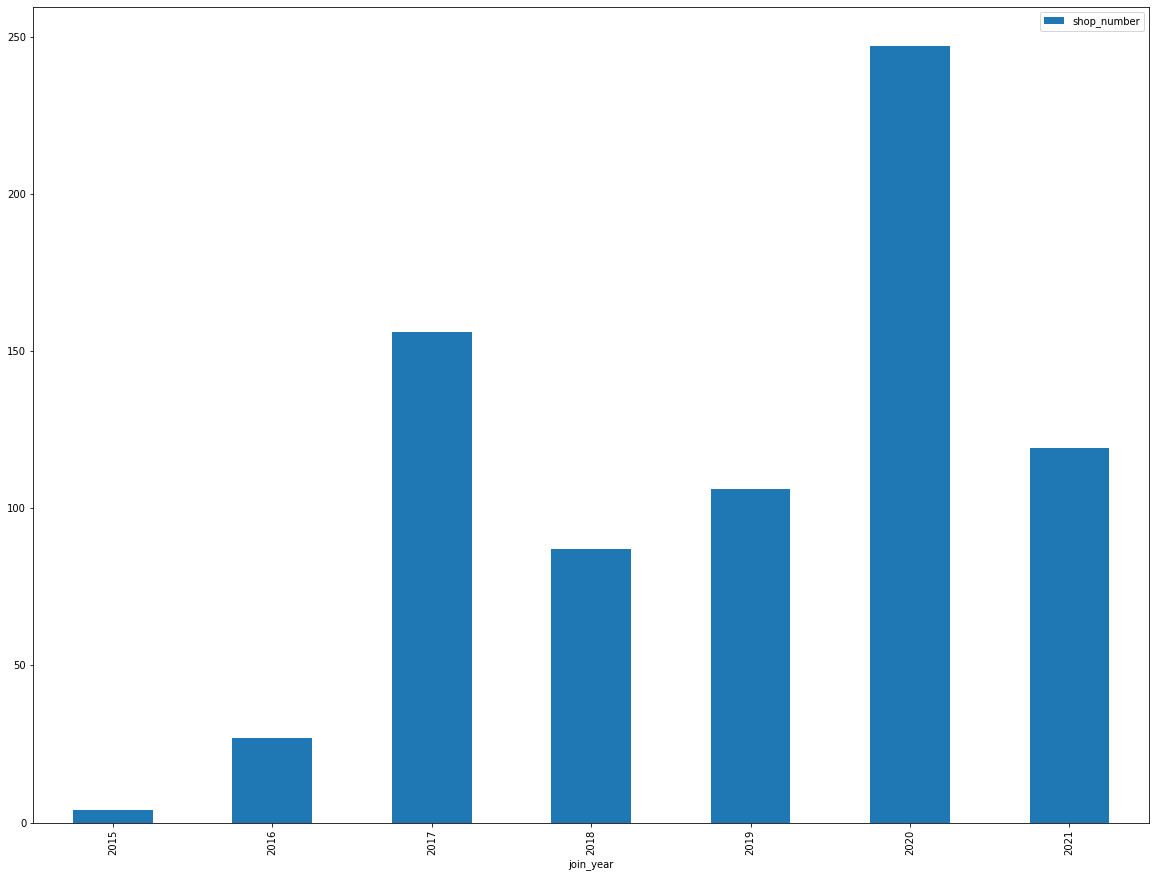

In [15]:
# Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm
shop_num.plot(kind='bar', figsize = (20,15))


# Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.


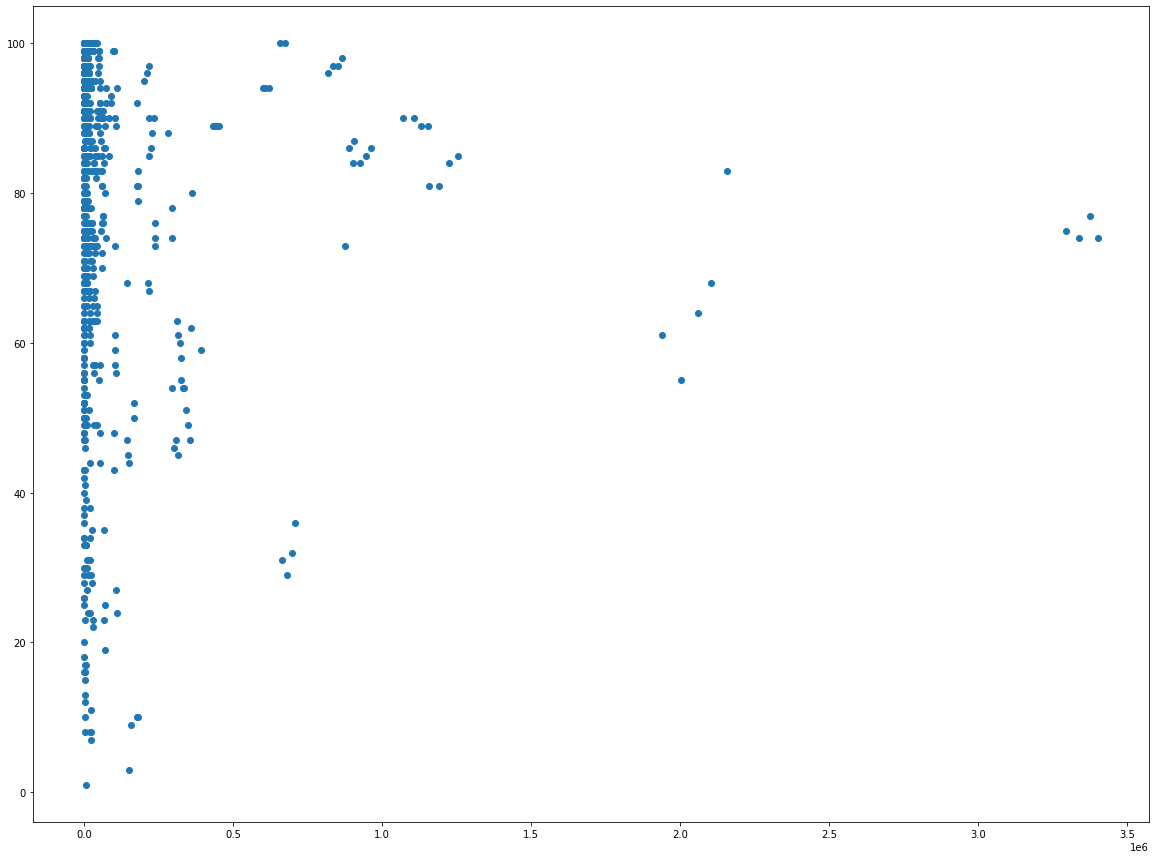

In [17]:
fig = plt.figure(figsize=(20,15))
plt.scatter(df['rating_good'], df['response_rate'])
plt.show()

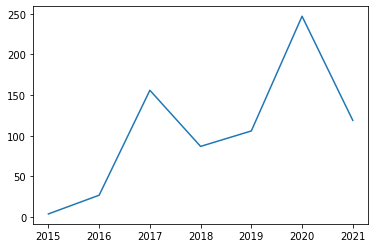

In [19]:
# Vẽ biểu đồ thể hiện xu hướng của số lượng shop gia nhập theo thời gian.
plt.plot(shop_num.index, shop_num.shop_number)

Text(0, 0.5, 'Frequency')

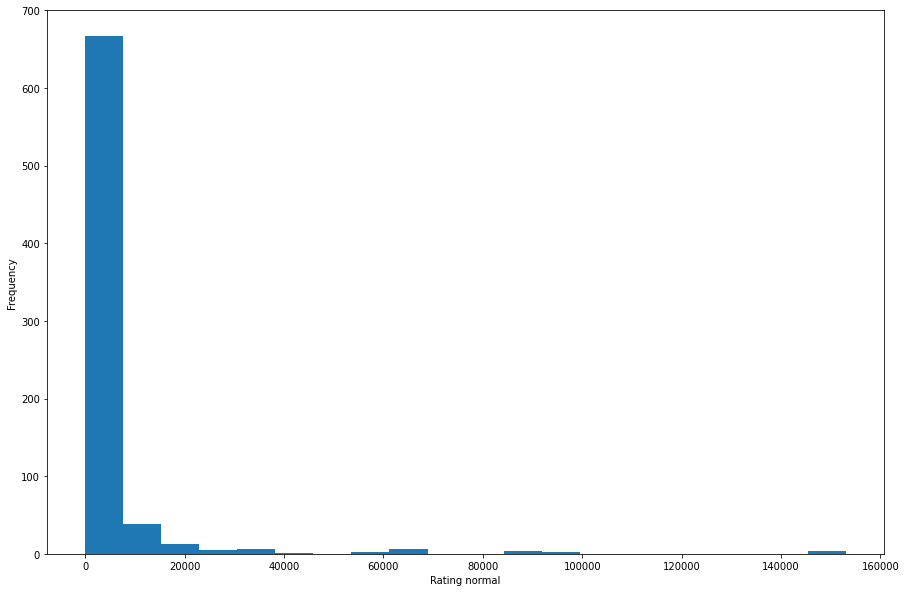

In [24]:
# Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 
plt.figure(figsize=(15,10))
plt.hist(df['rating_normal'], bins=20)
plt.xlabel('Rating normal')
plt.ylabel('Frequency')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f808f9ec50>,
 'caps': [<matplotlib.lines.Line2D at 0x1f808f9f2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f808f9d960>],
 'medians': [<matplotlib.lines.Line2D at 0x1f808f9f790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f808f9fa60>],
 'means': []}

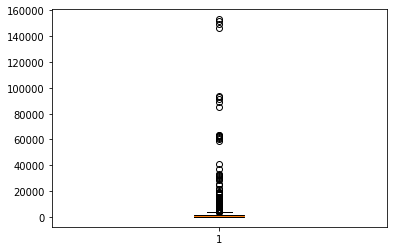